<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/quests/EDAs/EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설치 및 시각화

In [18]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (45.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## EDA 각 과정에서 insight 도출
- 제안 3: 연체 위험도 예측
 + 문제 정의: 고객의 연체 기록, 신용 등급, 계약 유형 등을 사용하여 미래의 연체 가능성을 예측합니다.
 + 배경: 연체 위험도가 높은 고객을 사전에 식별하여, 적절한 조치를 취함으로써 재정적 손실을 최소화할 수 있습니다

In [3]:
import pandas as pd
df_LCOCT = pd.read_csv('LetalCarOfContractType.csv')
df_LCOCT.dropna(inplace=True)
df_LCOCT[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [4]:
df_LCOCT.info()
df_LCOCT.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40480 non-null  int64  
 1   type_of_contract   40480 non-null  object 
 2   type_of_contract2  40480 non-null  object 
 3   channel            40480 non-null  object 
 4   datetime           40480 non-null  object 
 5   Term               40480 non-null  int64  
 6   payment_type       40480 non-null  object 
 7   product            40480 non-null  object 
 8   amount             40480 non-null  int64  
 9   state              40480 non-null  object 
 10  overdue_count      40480 non-null  int64  
 11  overdue            40480 non-null  object 
 12  credit rating      40480 non-null  float64
 13  bank               40480 non-null  object 
 14  cancellation       40480 non-null  object 
 15  age                40480 non-null  float64
 16  Mileage            404

### 기술 데이터 분석(DDA)

In [5]:
# 연체 기록 분포 확인
df_LCOCT['overdue'].value_counts()
# 연체 기록이 있는 고객만 선별
df_is_overdue = df_LCOCT.query('overdue == "있음"')
# 연체 횟수
df_is_overdue['overdue_count'].describe()

# 연체 기록이 있는 고객 중 연체 횟수 중앙값은 2 이다.
# 인사이트 : 연체 기록이 있는 고객 중 연체 기록이 중앙값보다 높은 3번 이상인 고객이 연체 위험도가 높다고 판단.

count    1461.000000
mean        4.060917
std         4.097074
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max        15.000000
Name: overdue_count, dtype: float64

In [6]:
# 신용 등급 분포(범주형) 확인
df_LCOCT['credit rating'].value_counts()

# 대부분의 고객들이 1~5등급 범위의 신용등급을 가지고 있다.
# 인사이트 : 일반적으로 신용등급이 낮을수록(숫자가 클수록) 연체 위험도가 높아질 가능성이 있으므로,
# 신용등급 6등급부터 연체 위험도가 높다고 판단.

1.0     10245
2.0      7811
4.0      5137
3.0      4777
5.0      4116
6.0      3624
7.0      2589
8.0      1466
9.0       610
0.0        60
10.0       45
Name: credit rating, dtype: int64

### EDA
- 추가 확인 후 인사이트 재조정

In [9]:
# 연체기록이 있는 고객의 연령 분포 확인
df_is_overdue['age'].describe()

count    1461.000000
mean       46.197810
std        13.159554
min        20.000000
25%        37.000000
50%        45.000000
75%        55.000000
max        98.000000
Name: age, dtype: float64

<Axes: xlabel='overdue_count', ylabel='age'>

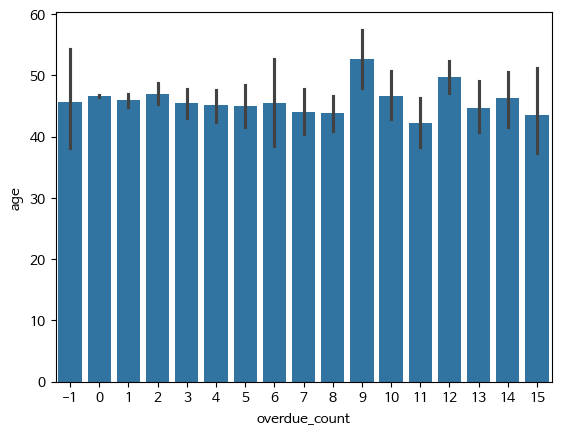

In [23]:
sns.barplot(data=df_LCOCT, x='overdue_count', y='age')

## 보고용 insight 작성

- 연체 기록 분포 확인
 + 연체 기록이 있는 고객 중에서 분석했을 때, 연체 횟수가 중앙(1 ~ 7)에 분포해 있음.
 + 전략 제안 : 연체 기록이 있는 고객 중 연체 기록이 중앙값보다 높은 3번 이상인 고객이 연체 위험도가 높다고 판단.

- 신용 등급 분포 확인
 + 분석 결과 : 대부분의 고객들이 1~5등급 범위의 신용등급을 가지고 있음.
 + 전략 제안 : 일반적으로 신용등급이 낮을수록(숫자가 클수록) 연체 위험도가 높아질 가능성이 있으므로, 연체 위험도가 높은 고객을 사전에 식별하여, 적절한 조치를 취해야 함.